In [2]:
### Exploratory Data Analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

machine = pd.read_csv(r"C:\Users\CalumBrown\OneDrive - Blend 360\Documents\Personal Development\Machine Learning Interview\Cleaned Machine Failure Dataset.csv", index_col=0)

In [3]:
machine.head()

UID Machine Type  Air temperature [K]  Process temperature [K]  \
0  M14860           x1                298.1                    308.6   
1  L47181          x_1                298.2                    308.7   
2  L47182          x_1                298.1                    308.5   
3  L47183          x_1                298.2                    308.6   
4  L47184          x_1                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min] Failure Type  \
0                  1551.0         42.8                0   No Failure   
1                  1408.0         46.3                3   No Failure   
2                  1498.0         49.4                5   No Failure   
3                  1433.0         39.5                7   No Failure   
4                  1408.0         40.0                9   No Failure   

             Timestamp        Date                 Time  Failure  
0  2001-12-01 00:00:00  2001-01-12  2026-01-03 00:00:00        0  
1  2001-12-01 01:00:00  2001-01-12  2026-01-03 01:00:00        0  
2  2001-12-01 02:00:00  2001-01-12  2026-01-03 02:00:00        0  
3  2001-12-01 03:00:00  2001-01-12  2026-01-03 03:00:00        0  
4  2001-12-01 04:00:00  2001-01-12  2026-01-03 04:00:00        0

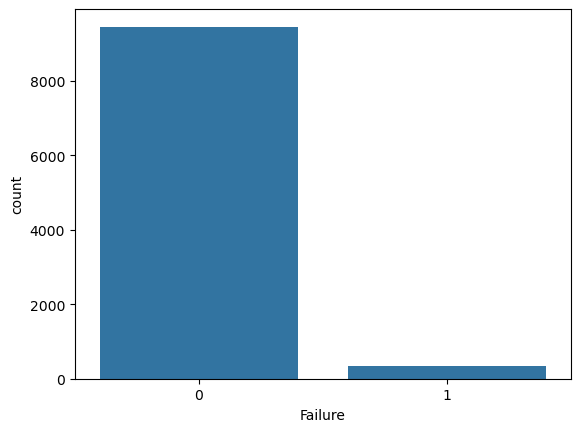

Failure
0    9455
1     346
Name: count, dtype: int64
3.66 %


In [4]:
# Looking at failure statistics
# 346 instances of failure compared to 9455 no fails
# 3.6% failure instance

sns.countplot(x = machine['Failure'])
plt.show()

print(machine['Failure'].value_counts())

print(np.round(346/9455 * 100, 2),'%')

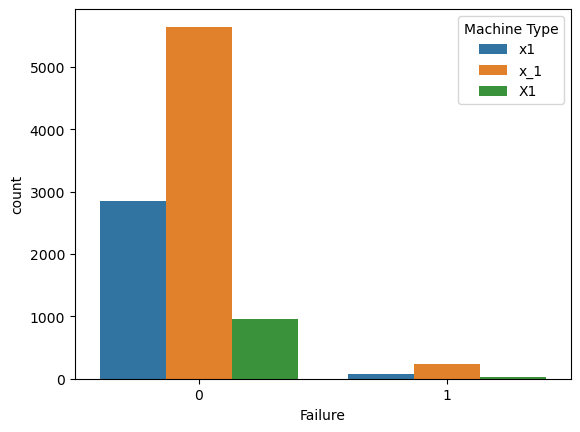

Machine Type  Failure
X1            0           959
              1            24
x1            0          2854
              1            81
x_1           0          5642
              1           241
Name: count, dtype: int64


In [5]:
# Checking to see differences across machine types
# Looks pretty proportional on the whole

sns.countplot(x = machine['Failure'], hue = machine['Machine Type'])
plt.show()

print(machine[['Machine Type', 'Failure']].value_counts().sort_index())


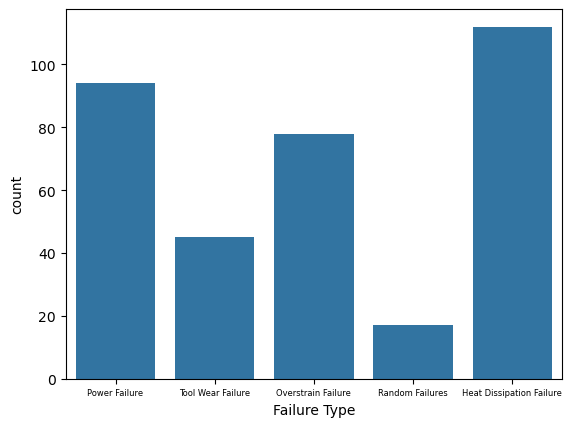

Failure Type
Heat Dissipation Failure    112
Power Failure                94
Overstrain Failure           78
Tool Wear Failure            45
Random Failures              17
Name: count, dtype: int64


In [6]:
# Looking at failures by failure type - ehat dissipation the most common 
sns.countplot(x= machine.loc[machine['Failure'] == 1]['Failure Type'])
plt.xticks(fontsize = 6)
plt.show()
print(machine.loc[machine['Failure'] == 1]['Failure Type'].value_counts())

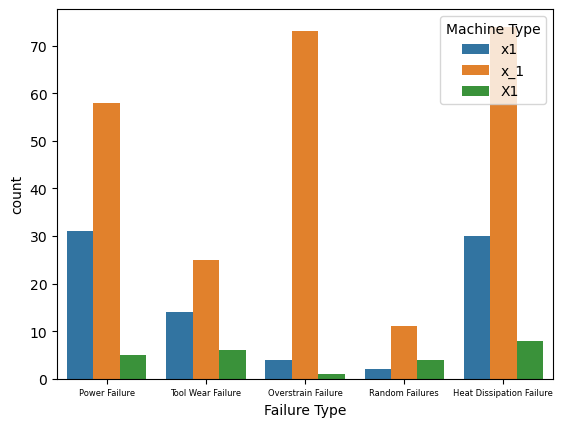

Machine Type  Failure Type            
X1            Heat Dissipation Failure     8
              Overstrain Failure           1
              Power Failure                5
              Random Failures              4
              Tool Wear Failure            6
x1            Heat Dissipation Failure    30
              Overstrain Failure           4
              Power Failure               31
              Random Failures              2
              Tool Wear Failure           14
x_1           Heat Dissipation Failure    74
              Overstrain Failure          73
              Power Failure               58
              Random Failures             11
              Tool Wear Failure           25
Name: count, dtype: int64


In [7]:
sns.countplot(x= machine.loc[machine['Failure'] == 1]['Failure Type'], hue= machine['Machine Type'])
plt.xticks(fontsize = 6)
plt.show()
print(machine.loc[machine['Failure'] == 1][['Machine Type', 'Failure Type']].value_counts().sort_index())

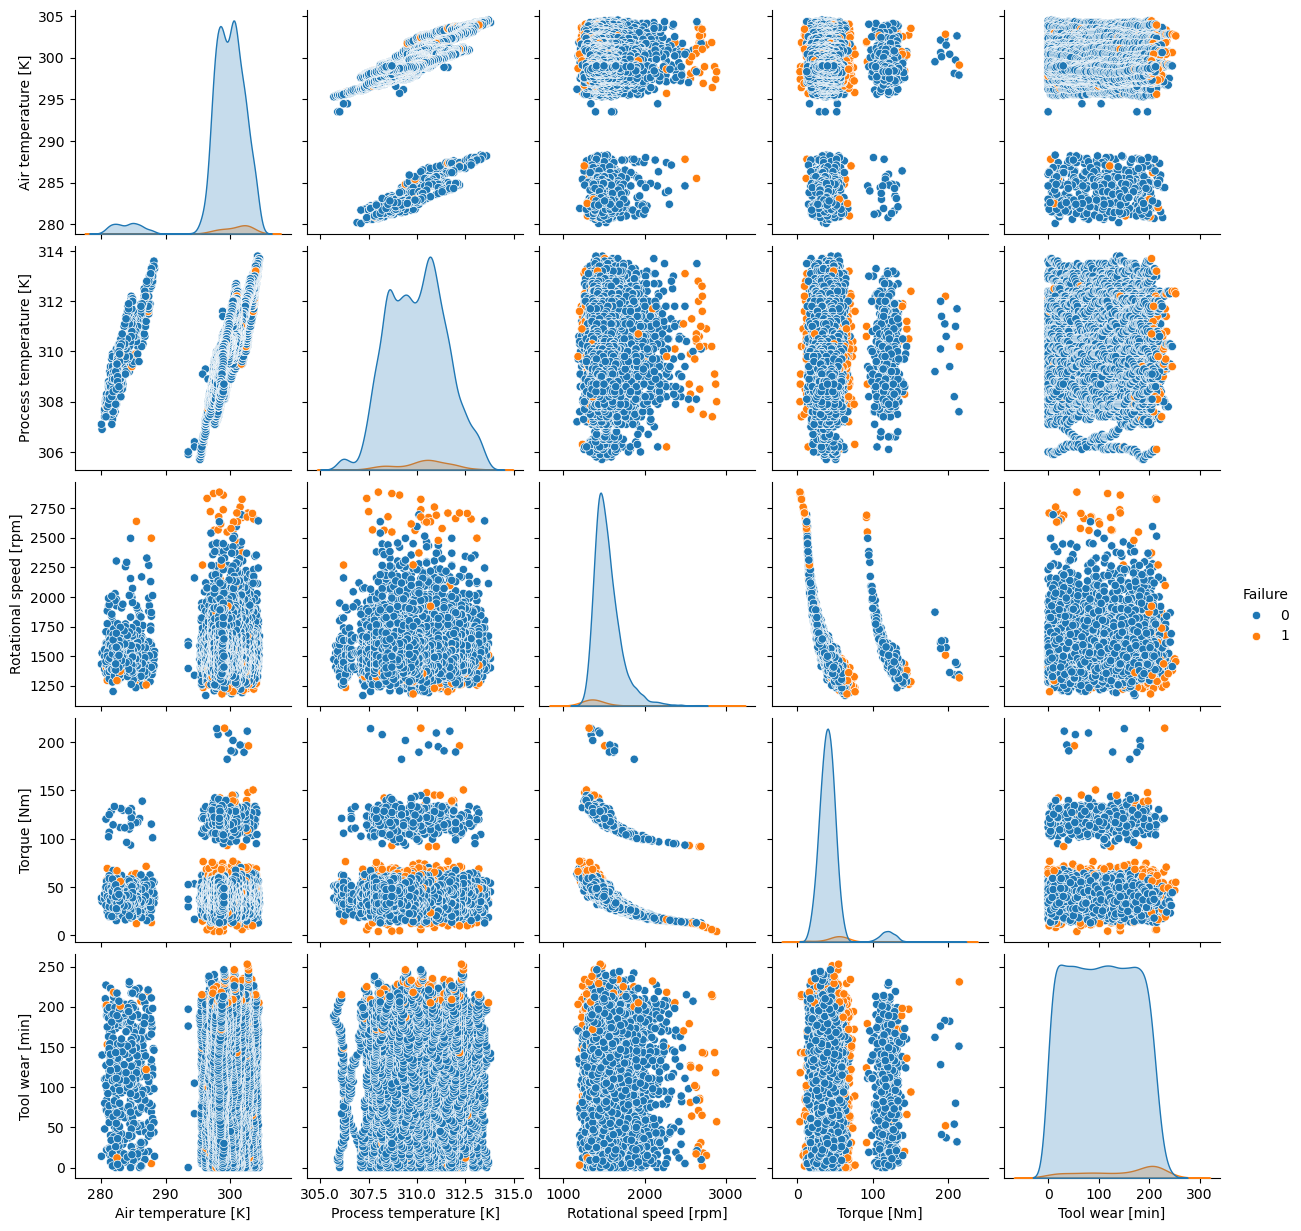

In [8]:
# Looking broadly at correlation between variables with legend as failure to see if can spot any trends
# Can see quite a clear grouping of failures at higher rotational speeds, and also higher air temperatures
# Tool wear also looks to have quite a clear grouping of failures at higher values

#Looks like we have some correlation between air temp and process temp, and also rotational speed and torque
sns.pairplot(machine, hue = 'Failure')

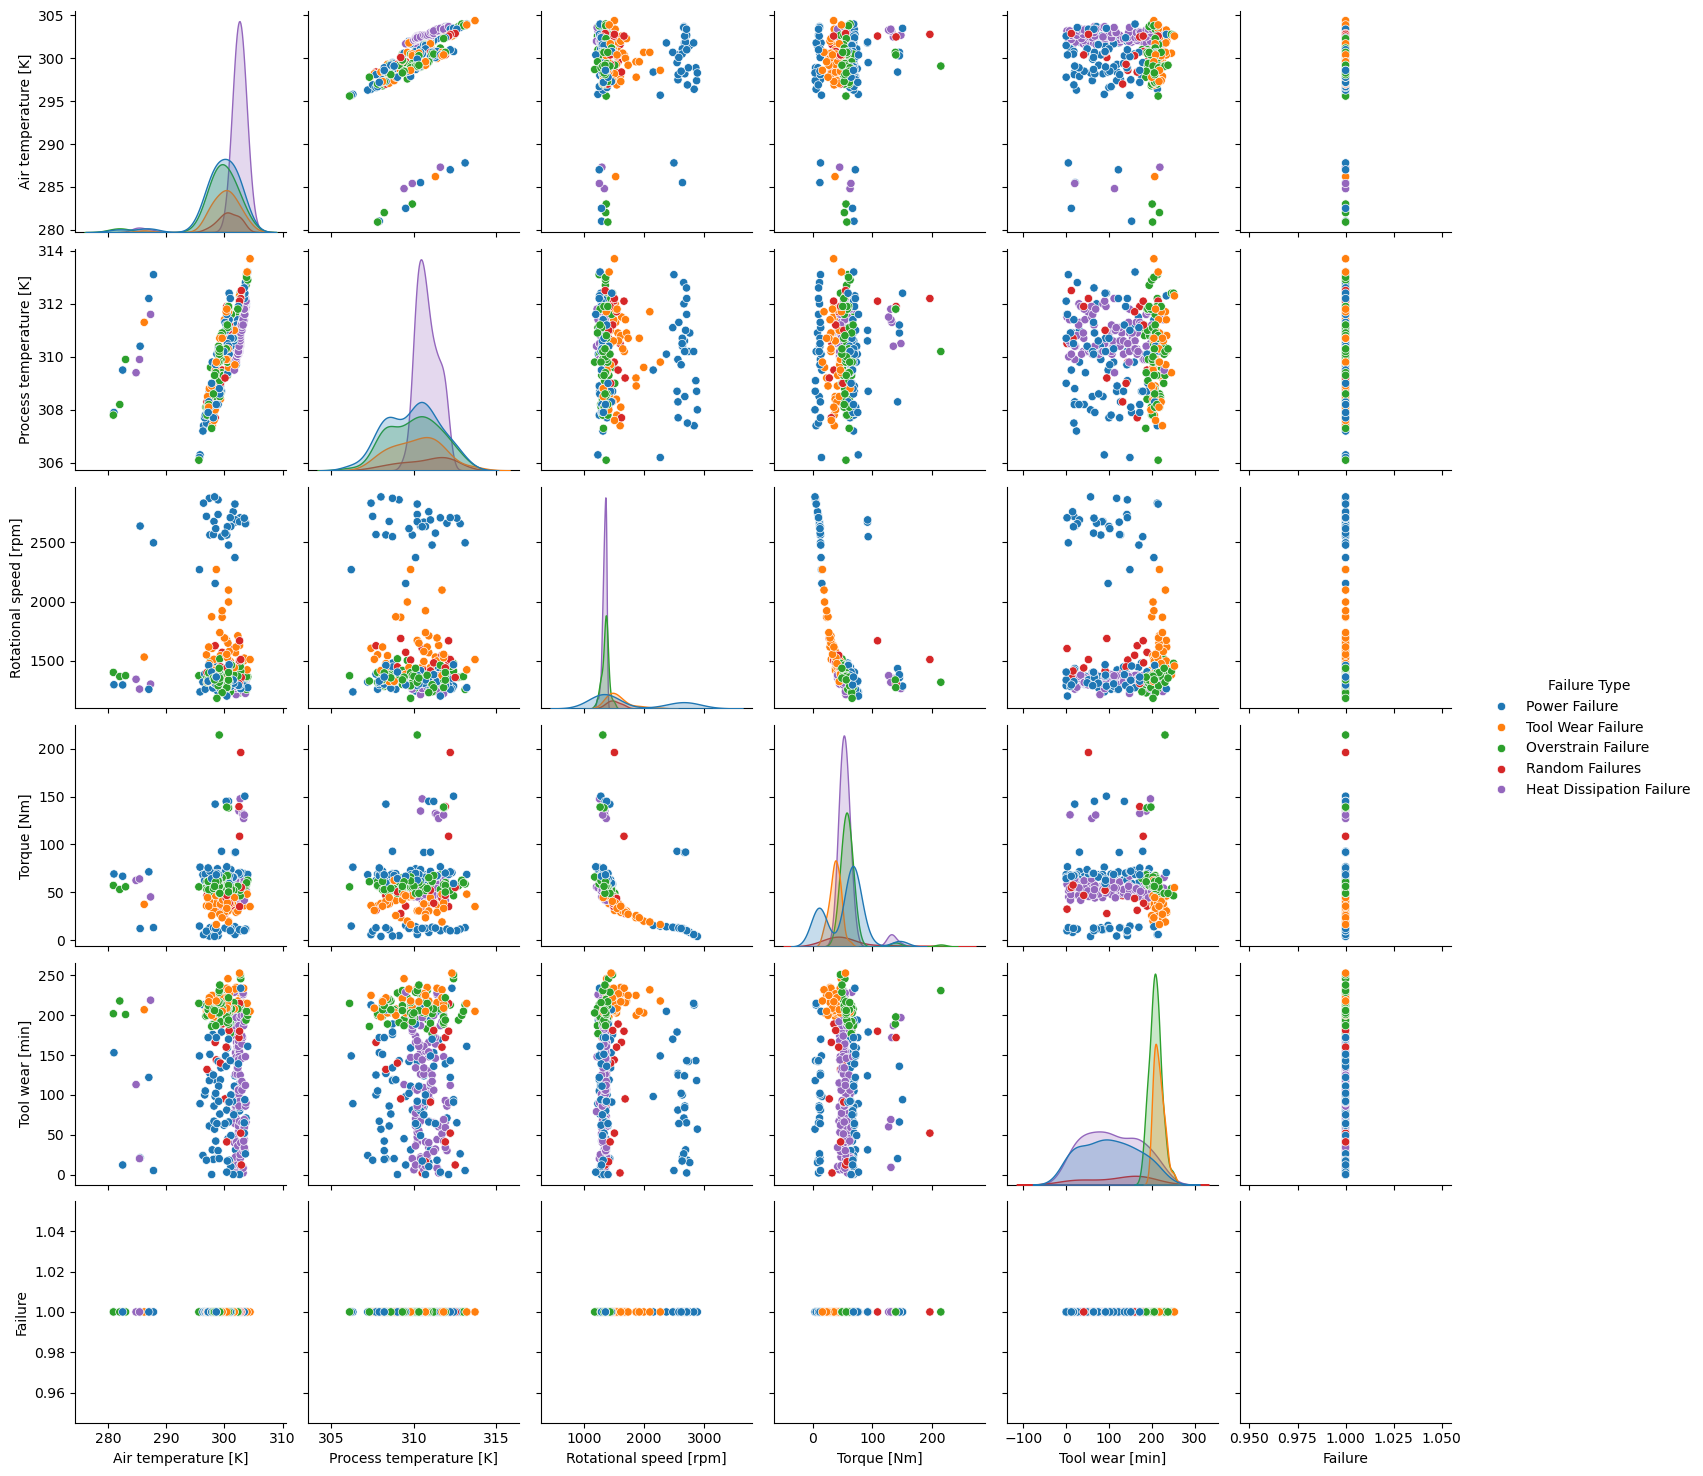

In [ ]:
# Same plot but now only for failures
# Interesting to see breakdown of which failures occur - goves good idea for closer look 
machinefail = machine.loc[machine['Failure'] == 1]

sns.pairplot(machinefail, hue = 'Failure Type')

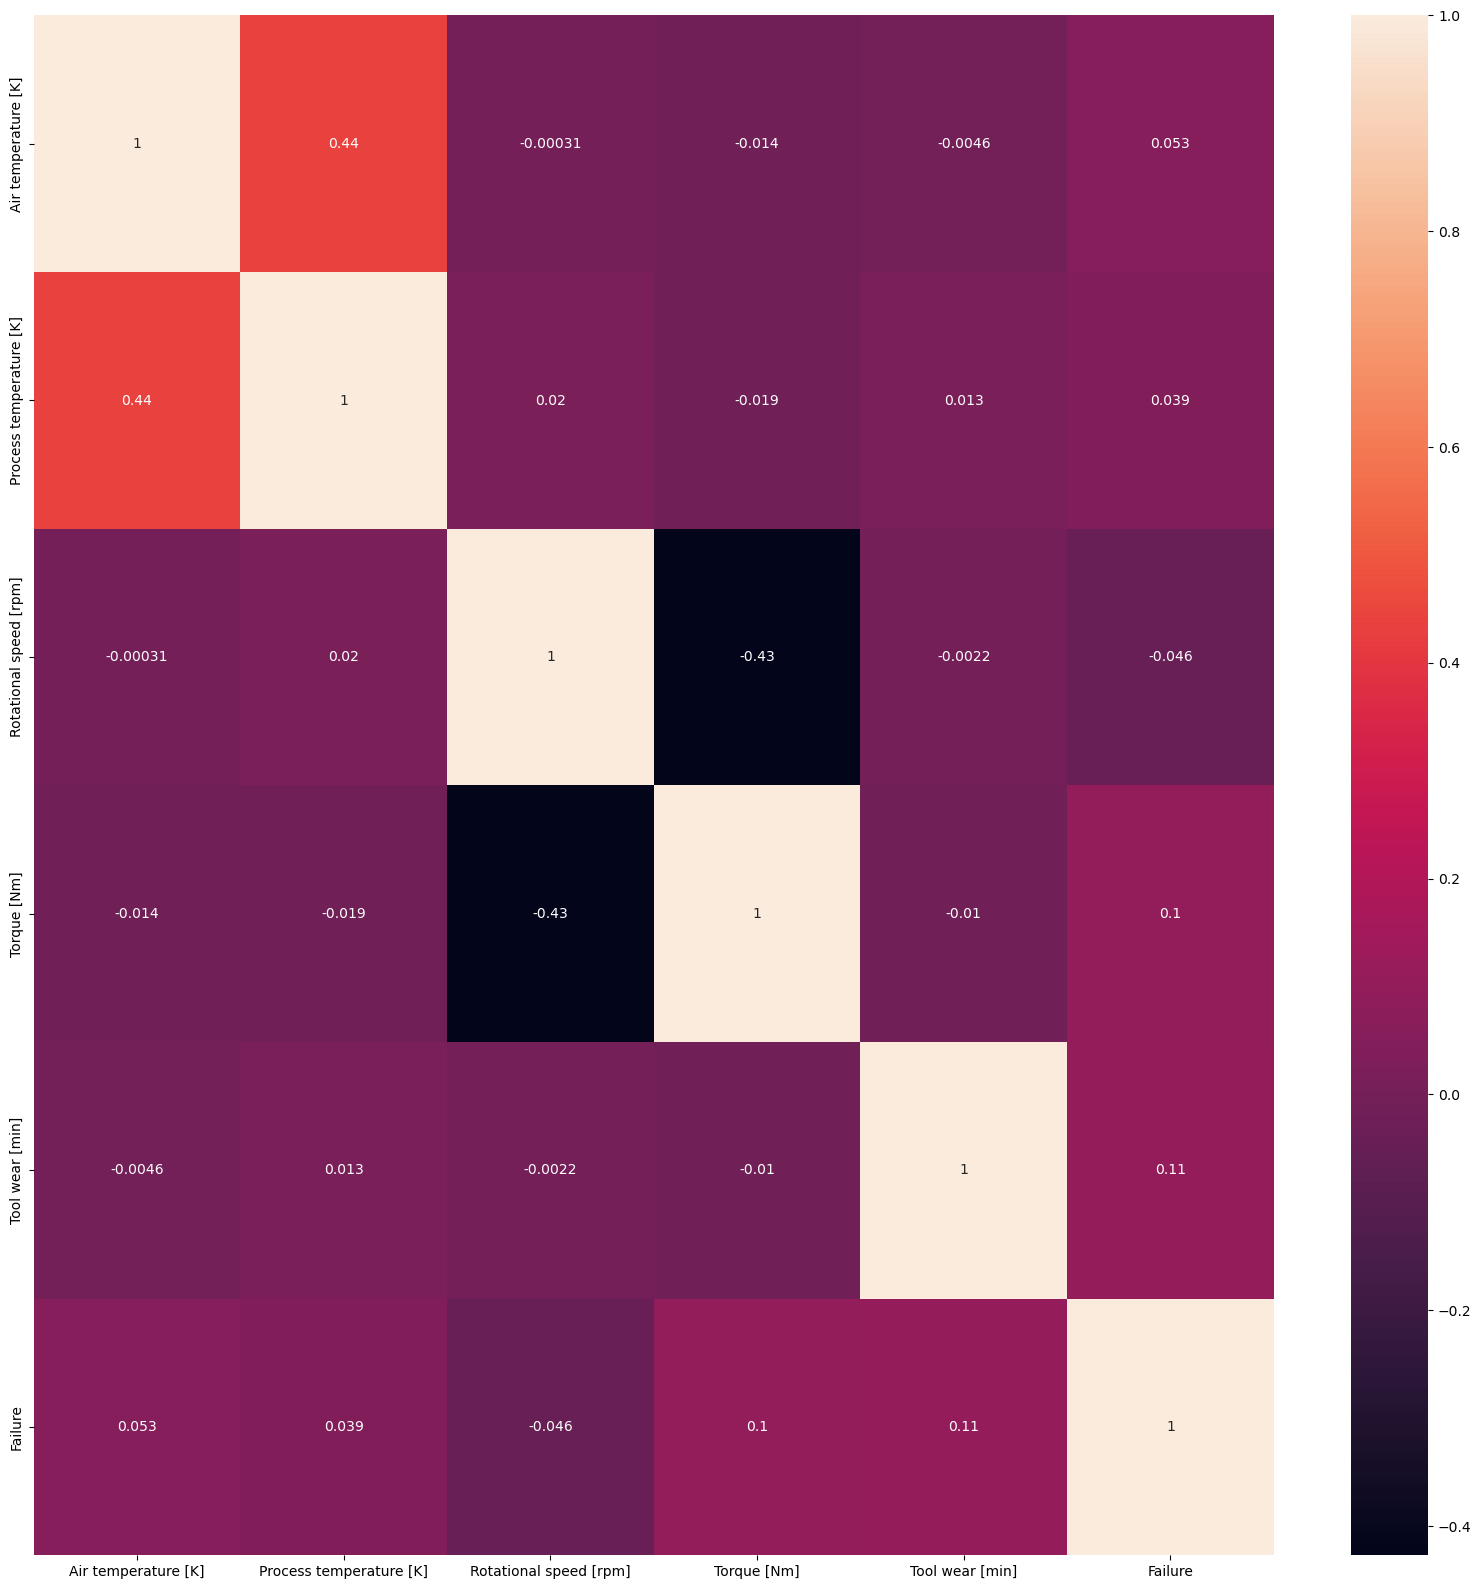

In [9]:
#Heatmap for correlations
# Heatmap shows mild positive correlation between the temperature variables and a mild negative between rotational speed and torque
# Neither correlations large enough to worry about causing multicollinearity in ML build

plt.figure(figsize=(20,20))
sns.heatmap(machine.drop(columns = ['UID','Timestamp', 'Date', 'Time', 'Failure Type', 'Machine Type']).corr(), annot=True)
plt.show()

In [10]:
# creating dummy variables for machine type and failure

machinetype = pd.get_dummies(machine['Machine Type']).astype(dtype=int)
failuretype = pd.get_dummies(machine['Failure Type']).astype(dtype=int)

machine2 = pd.concat([machine, machinetype, failuretype], axis=1)

In [11]:
machine2 = machine2.drop(columns = ['Machine Type', 'Failure Type'])

In [12]:
machine2

UID  Air temperature [K]  Process temperature [K]  \
0     M14860                298.1                    308.6   
1     L47181                298.2                    308.7   
2     L47182                298.1                    308.5   
3     L47183                298.2                    308.6   
4     L47184                298.2                    308.7   
...      ...                  ...                      ...   
9895  M24855                298.8                    308.4   
9896  H39410                298.9                    308.4   
9897  M24857                299.0                    308.6   
9898  H39412                299.0                    308.7   
9899  M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
0                     1551.0         42.8                0   
1                     1408.0         46.3                3   
2                     1498.0         49.4                5   
3                     1433.0         39.5                7   
4                     1408.0         40.0                9   
...                      ...          ...              ...   
9895                  1604.0         29.5               14   
9896                  1632.0         31.8               17   
9897                  1645.0         33.4               22   
9898                  1408.0         48.5               25   
9899                  1500.0         40.2               30   

                Timestamp        Date                 Time  Failure  X1  x1  \
0     2001-12-01 00:00:00  2001-01-12  2026-01-03 00:00:00        0   0   1   
1     2001-12-01 01:00:00  2001-01-12  2026-01-03 01:00:00        0   0   0   
2     2001-12-01 02:00:00  2001-01-12  2026-01-03 02:00:00        0   0   0   
3     2001-12-01 03:00:00  2001-01-12  2026-01-03 03:00:00        0   0   0   
4     2001-12-01 04:00:00  2001-01-12  2026-01-03 04:00:00        0   0   0   
...                   ...         ...                  ...      ...  ..  ..   
9895  2003-01-21 11:00:00  2003-01-21  2026-01-03 11:00:00        0   0   1   
9896  2003-01-21 12:00:00  2003-01-21  2026-01-03 12:00:00        0   1   0   
9897  2003-01-21 13:00:00  2003-01-21  2026-01-03 13:00:00        0   0   1   
9898  2003-01-21 14:00:00  2003-01-21  2026-01-03 14:00:00        0   1   0   
9899  2003-01-21 15:00:00  2003-01-21  2026-01-03 15:00:00        0   0   1   

      x_1  Heat Dissipation Failure  No Failure  Overstrain Failure  \
0       0                         0           1                   0   
1       1                         0           1                   0   
2       1                         0           1                   0   
3       1                         0           1                   0   
4       1                         0           1                   0   
...   ...                       ...         ...                 ...   
9895    0                         0           1                   0   
9896    0                         0           1                   0   
9897    0                         0           1                   0   
9898    0                         0           1                   0   
9899    0                         0           1                   0   

      Power Failure  Random Failures  Tool Wear Failure  
0                 0                0                  0  
1                 0                0                  0  
2                 0                0                  0  
3                 0                0                  0  
4                 0                0                  0  
...             ...              ...                ...  
9895              0                0                  0  
9896              0                0                  0  
9897              0                0                  0  
9898              0                0                  0  
9899              0                0                  0  

[9801 rows x 19 colu

In [13]:
machine2.drop(columns = ['UID','Timestamp', 'Date', 'Time']).corr()

Air temperature [K]  Process temperature [K]  \
Air temperature [K]                  1.000000                 0.437990   
Process temperature [K]              0.437990                 1.000000   
Rotational speed [rpm]              -0.000312                 0.019734   
Torque [Nm]                         -0.013590                -0.019025   
Tool wear [min]                     -0.004561                 0.013410   
Failure                              0.052643                 0.038677   
X1                                  -0.016611                -0.017713   
x1                                   0.010783                 0.006571   
x_1                                  0.000104                 0.004718   
Heat Dissipation Failure             0.079406                 0.057590   
No Failure                          -0.052643                -0.038677   
Overstrain Failure                  -0.000259                 0.002780   
Power Failure                       -0.001339                -0.005083   
Random Failures                      0.014971                 0.018548   
Tool Wear Failure                    0.011918                 0.007294   

                          Rotational speed [rpm]  Torque [Nm]  \
Air temperature [K]                    -0.000312    -0.013590   
Process temperature [K]                 0.019734    -0.019025   
Rotational speed [rpm]                  1.000000    -0.427069   
Torque [Nm]                            -0.427069     1.000000   
Tool wear [min]                        -0.002157    -0.010173   
Failure                                -0.045520     0.101788   
X1                                     -0.000625    -0.005232   
x1                                     -0.004060    -0.002009   
x_1                                     0.004179     0.005087   
Heat Dissipation Failure               -0.120442     0.068947   
No Failure                              0.045520    -0.101788   
Overstrain Failure                     -0.092223     0.074600   
Power Failure                           0.125111     0.049942   
Random Failures                        -0.009606     0.035306   
Tool Wear Failure                       0.011854    -0.022320   

                          Tool wear [min]   Failure        X1        x1  \
Air temperature [K]             -0.004561  0.052643 -0.016611  0.010783   
Process temperature [K]          0.013410  0.038677 -0.017713  0.006571   
Rotational speed [rpm]          -0.002157 -0.045520 -0.000625 -0.004060   
Torque [Nm]                     -0.010173  0.101788 -0.005232 -0.002009   
Tool wear [min]                  1.000000  0.106145 -0.003051 -0.005475   
Failure                          0.106145  1.000000 -0.019698 -0.027296   
X1                              -0.003051 -0.019698  1.000000 -0.218295   
x1                              -0.005475 -0.027296 -0.218295  1.000000   
x_1                              0.006990  0.037602 -0.409128 -0.801160   
Heat Dissipation Failure        -0.000889  0.562034 -0.010332 -0.007418   
No Failure                      -0.106145 -1.000000  0.019698  0.027296   
Overstrain Failure               0.141138  0.468209 -0.026082 -0.048531   
Power Failure                   -0.009656  0.514416 -0.015431  0.006516   
Random Failures                  0.005940  0.217901  0.018733 -0.016546   
Tool Wear Failure                0.115912  0.355028  0.007469  0.001728   

                               x_1  Heat Dissipation Failure  No Failure  \
Air temperature [K]       0.000104                  0.079406   -0.052643   
Process temperature [K]   0.004718                  0.057590   -0.038677   
Rotational speed [rpm]    0.004179                 -0.120442    0.045520   
Torque [Nm]               0.005087                  0.068947   -0.101788   
Tool wear [min]           0.006990                 -0.000889   -0.106145   
Failure                   0.037602                  0.562034   -1.000000   
X1                       -0.409128                 -0.010332    0.0

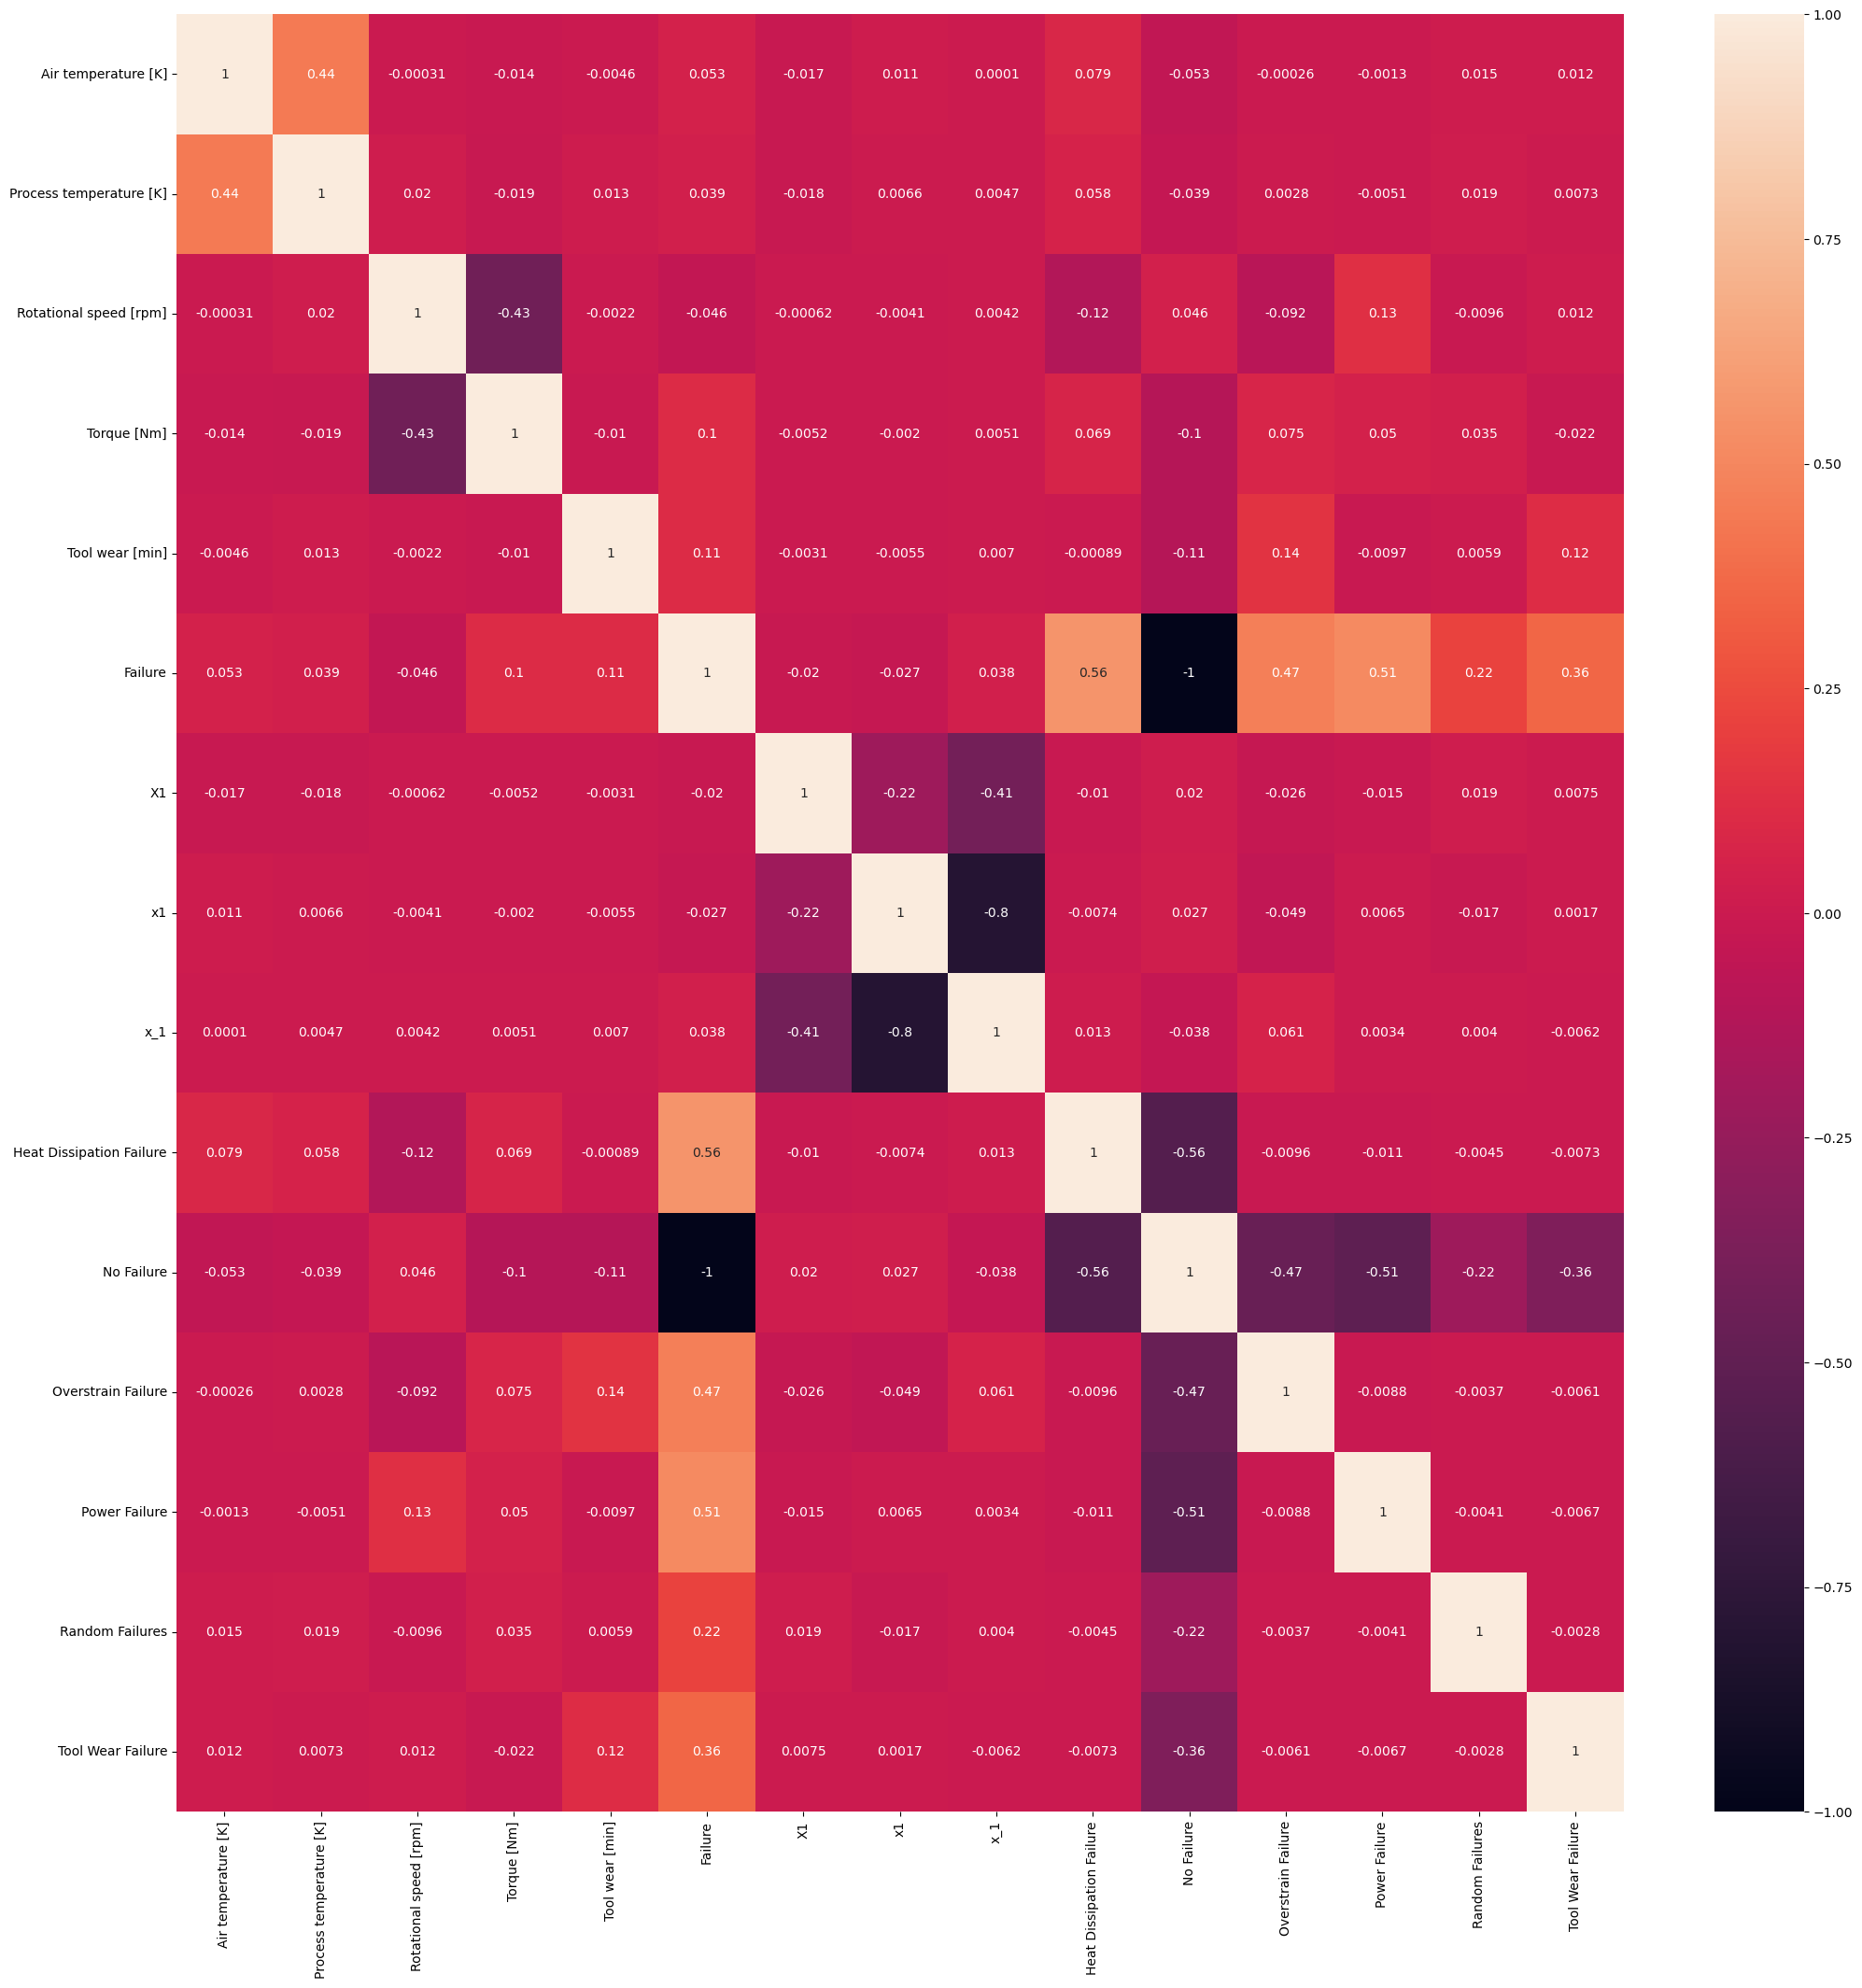

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(machine2.drop(columns = ['UID','Timestamp', 'Date', 'Time']).corr(), annot = True)
plt.show()

In [15]:
machine['Timestamp'] = pd.to_datetime(machine['Timestamp'])

In [16]:
failure_colors = {
    "Power Failure": "#1f77b4",         
    "Tool Wear Failure": "#ff7f0e",      
    "Overstrain Failure": "#2ca02c",     
    "Random Failures": "#d62728",       
    "Heat Dissipation Failure": "#9467bd" 
}

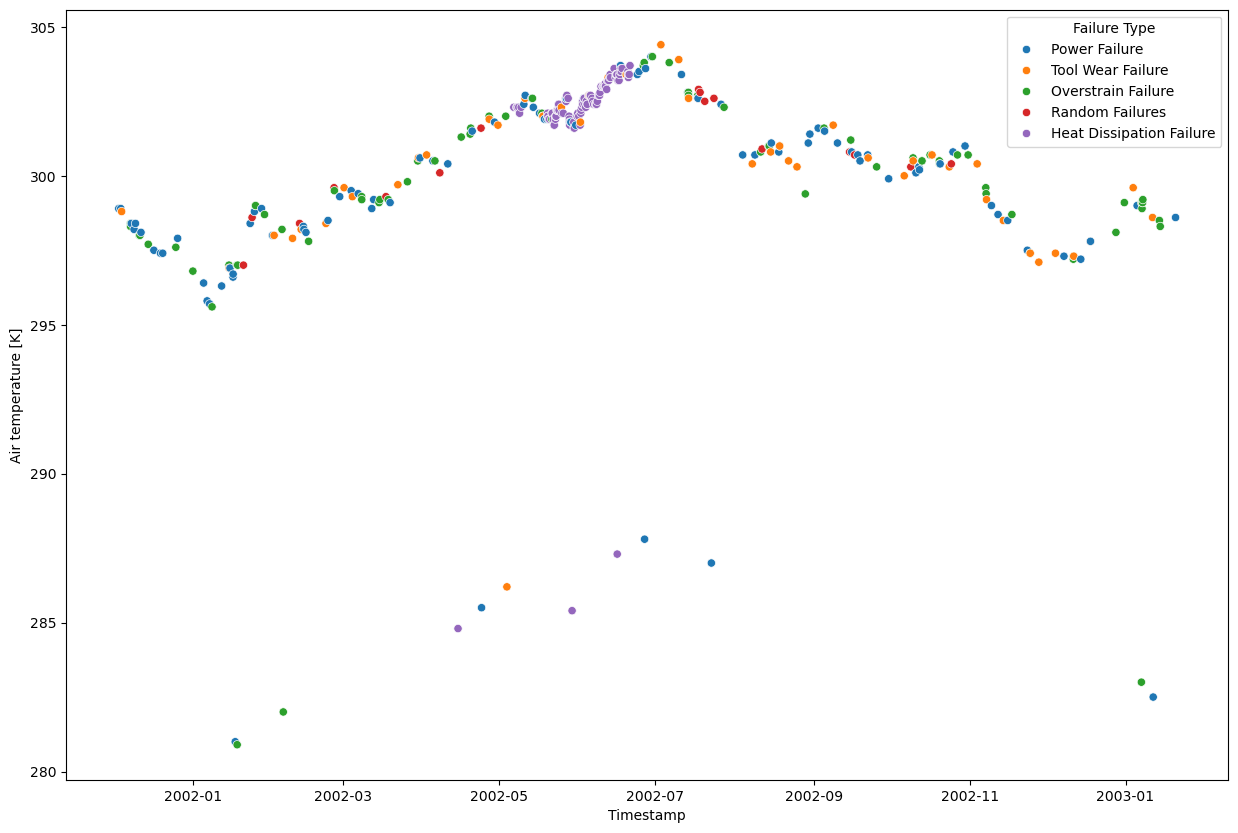

In [17]:
# Only looking at failures
# Start off with Air temperature
# Can see quite clealy that above 300 kelvin is where majority of heat dissipation failures occur
#Also all grouped in middle of dataset whih would be summer months - makes sense with higher air temperature

machinefail = machine.loc[machine['Failure'] == 1]
plt.figure(figsize=(15,10))
sns.scatterplot(x = machinefail['Timestamp'], y = machinefail['Air temperature [K]'], hue = machinefail['Failure Type'],  palette=failure_colors)
plt.show()

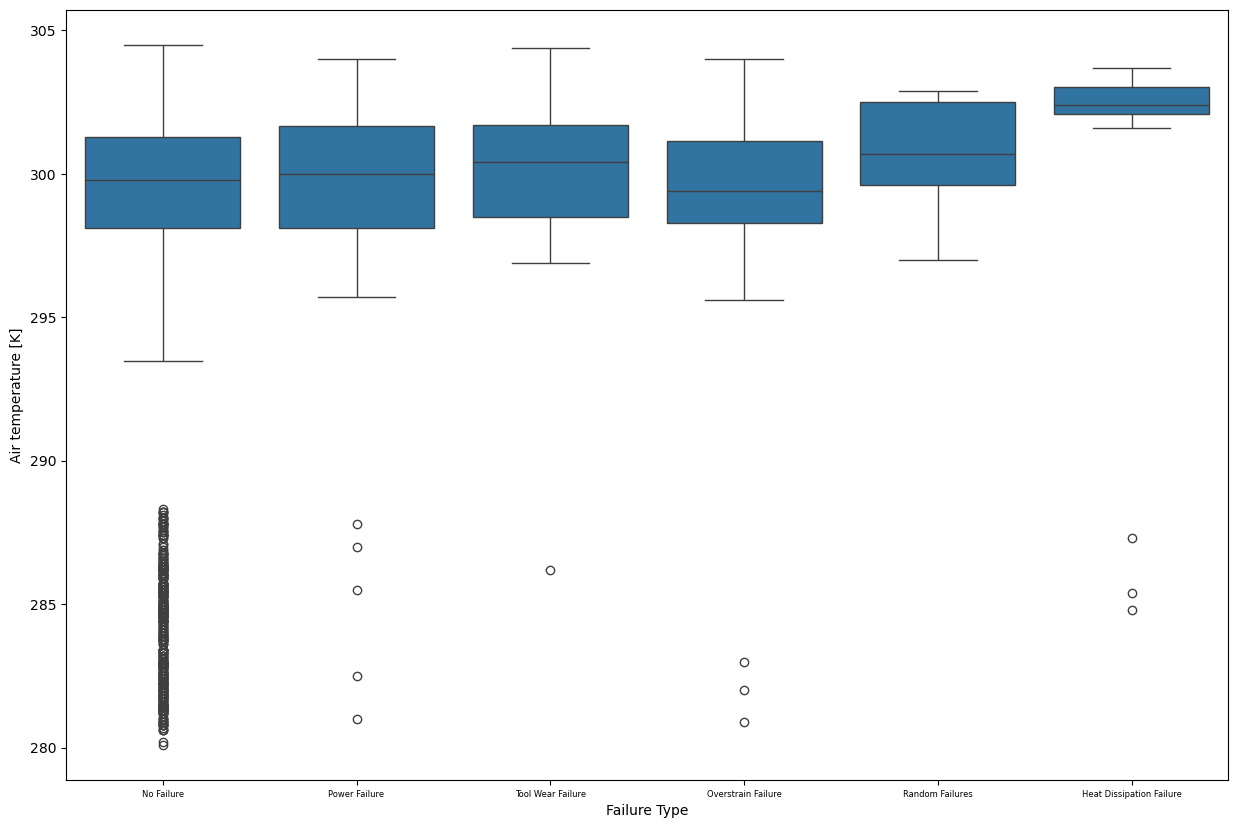

In [18]:
# Boxplot shows that basically all heat dissipation failures occur between around 202 and 303 kelvin. 
# This is pretty much the nly failure that occurs at this temperature consistently 
# Looks like if client keeps air temperature below 300 then number f heat dissipation failures could be greatly decreased 

plt.figure(figsize=(15,10))
sns.boxplot(x = machine['Failure Type'], y = machine['Air temperature [K]'])
plt.xticks(fontsize =6)
plt.show()

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

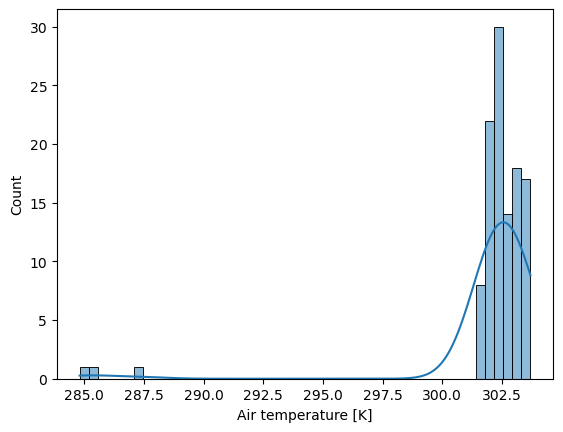

In [19]:
# Plotting these heat disspation failures agaiinst air temperature
# Again more illustration that air temperature over 300 kelvin is correlated with greatly increasing number of heat dissipation failures

heatfailure = machine.loc[machine['Failure Type'] == 'Heat Dissipation Failure']

sns.histplot(x = heatfailure['Air temperature [K]'], kde= True)

In [20]:
machine2.info()

machine2["Timestamp"] = pd.to_datetime(machine2["Timestamp"])


<class 'pandas.core.frame.DataFrame'>
Index: 9801 entries, 0 to 9899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UID                       9801 non-null   object 
 1   Air temperature [K]       9801 non-null   float64
 2   Process temperature [K]   9801 non-null   float64
 3   Rotational speed [rpm]    9801 non-null   float64
 4   Torque [Nm]               9801 non-null   float64
 5   Tool wear [min]           9801 non-null   int64  
 6   Timestamp                 9801 non-null   object 
 7   Date                      9801 non-null   object 
 8   Time                      9801 non-null   object 
 9   Failure                   9801 non-null   int64  
 10  X1                        9801 non-null   int32  
 11  x1                        9801 non-null   int32  
 12  x_1                       9801 non-null   int32  
 13  Heat Dissipation Failure  9801 non-null   int32  
 14  No Failure   

In [21]:
heatfailure['Timestamp'] = pd.to_datetime(heatfailure['Timestamp'])
heatfailure['monthname'] = heatfailure["Timestamp"].dt.month_name()



C:\Users\CalumBrown\AppData\Local\Temp\ipykernel_13804\578615940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatfailure['Timestamp'] = pd.to_datetime(heatfailure['Timestamp'])
C:\Users\CalumBrown\AppData\Local\Temp\ipykernel_13804\578615940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatfailure['monthname'] = heatfailure["Timestamp"].dt.month_name()


<Axes: xlabel='monthname', ylabel='count'>

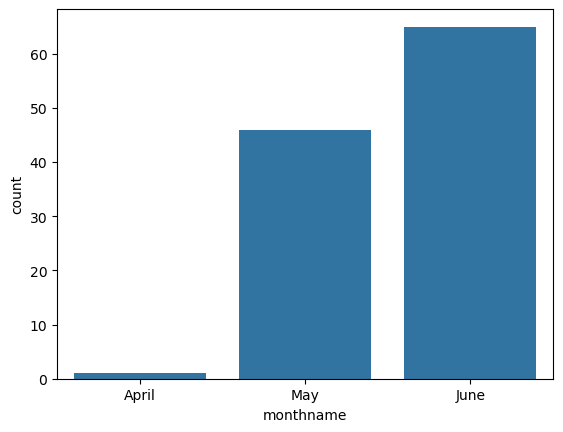

In [22]:
# Trying to visualise this with months on x axis to see if summer months are in fact where majority of these failures occur
# Using dataframe created earlier to look at large correlation plot
# Can clearly see the grouping in summer months of 2002 which makes sense with warmer temperatures
# Heatfailures only occur in April, May and June
sns.countplot(x = heatfailure['monthname'])


C:\Users\CalumBrown\AppData\Local\Temp\ipykernel_13804\1806203108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine4['Timestamp'] = pd.to_datetime(machine4['Timestamp'])
C:\Users\CalumBrown\AppData\Local\Temp\ipykernel_13804\1806203108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine4['monthname'] = machine4["Timestamp"].dt.month_name()


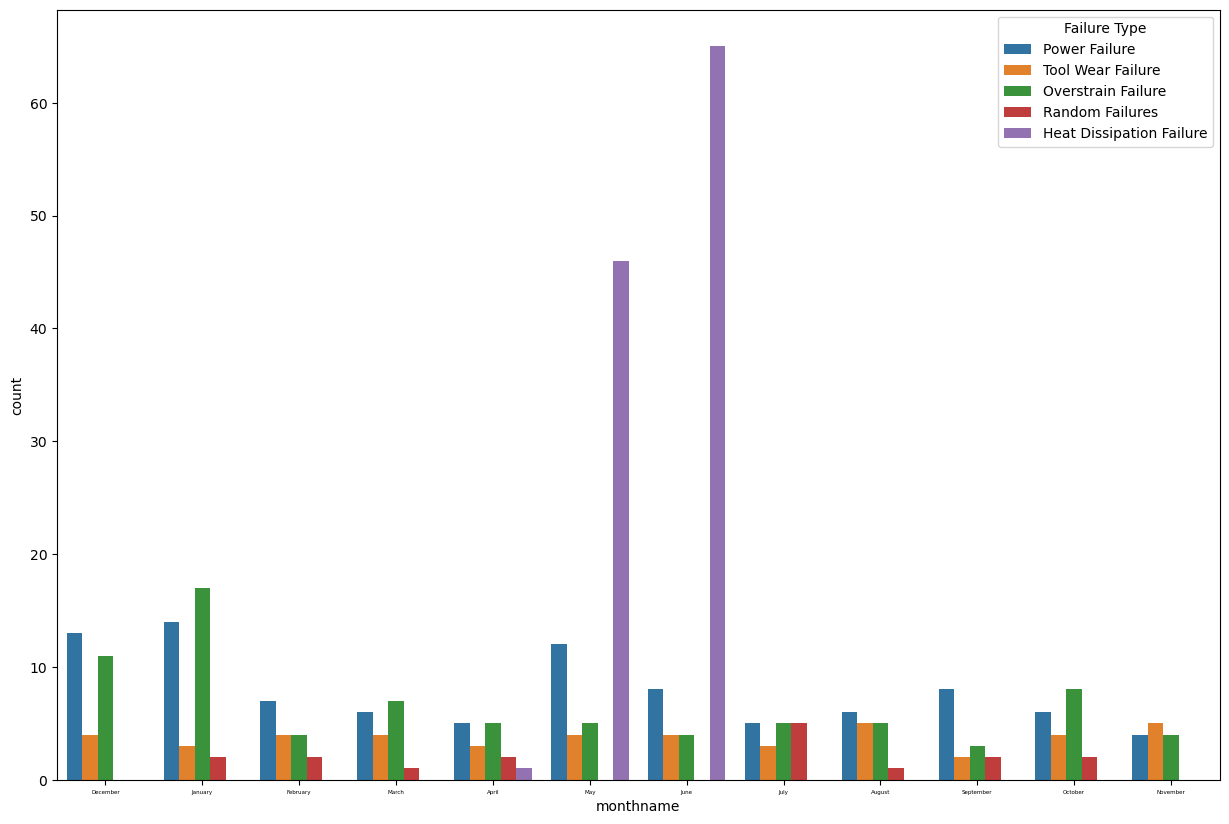

In [23]:
# Just another illustration of peak in summer months 
# Advice to client will be to maintain temperature below 300 kelvin to avoid heat dissipation failures
machine4 = machine.loc[machine['Failure'] == 1]
machine4['Timestamp'] = pd.to_datetime(machine4['Timestamp'])
machine4['monthname'] = machine4["Timestamp"].dt.month_name()
plt.figure(figsize=(15,10))
sns.countplot(x = machine4['monthname'], hue = machine4['Failure Type'])
plt.xticks(fontsize = 4)
plt.show()


In [24]:
np.mean(machine['Air temperature [K]'])

299.2458520960393

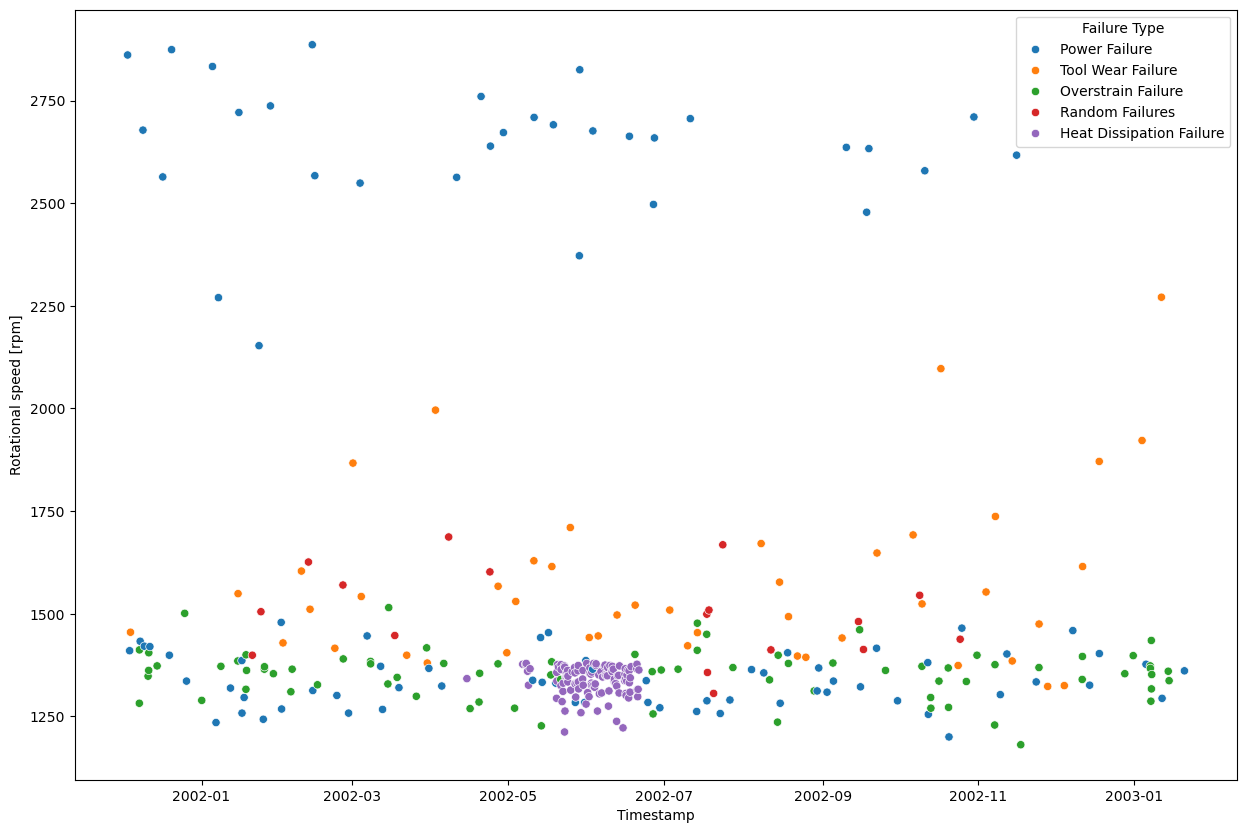

In [25]:
# Moving on to looking at rotational speed as observed a lot of failures at higher values of this 
# Visually looks quite clear that alot of power failures occur at high instances of rotational speed and also at lower
# There appears to be a sweet spot where no power failure occurs
# Early hypothesis would be if client can maintain speed inbetween certain speeds then can eradicate alot of power failures

machinefail = machine.loc[machine['Failure'] == 1]
plt.figure(figsize=(15,10))
sns.scatterplot(x = machinefail['Timestamp'], y = machinefail['Rotational speed [rpm]'], hue = machinefail['Failure Type'],  palette=failure_colors)
plt.show()

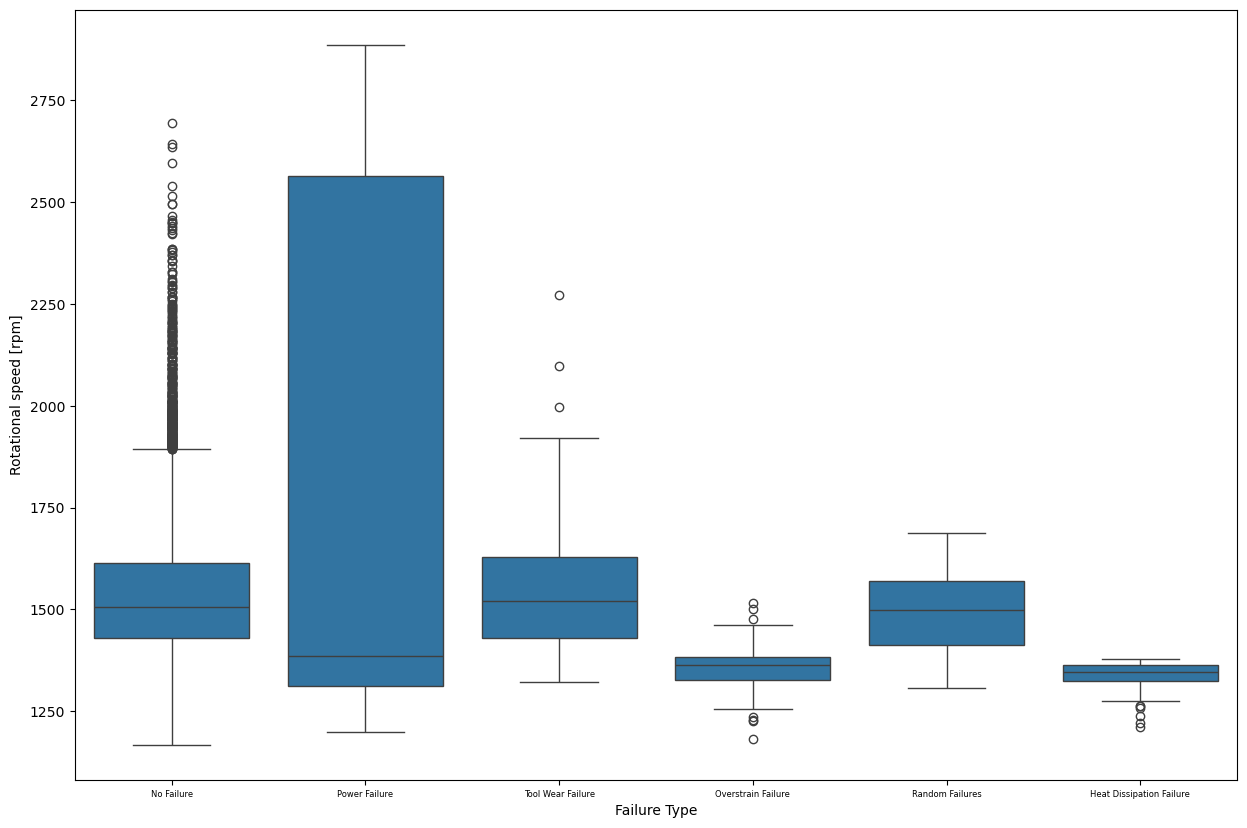

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(x = machine['Failure Type'], y = machine['Rotational speed [rpm]'])
plt.xticks(fontsize =6)
plt.show()

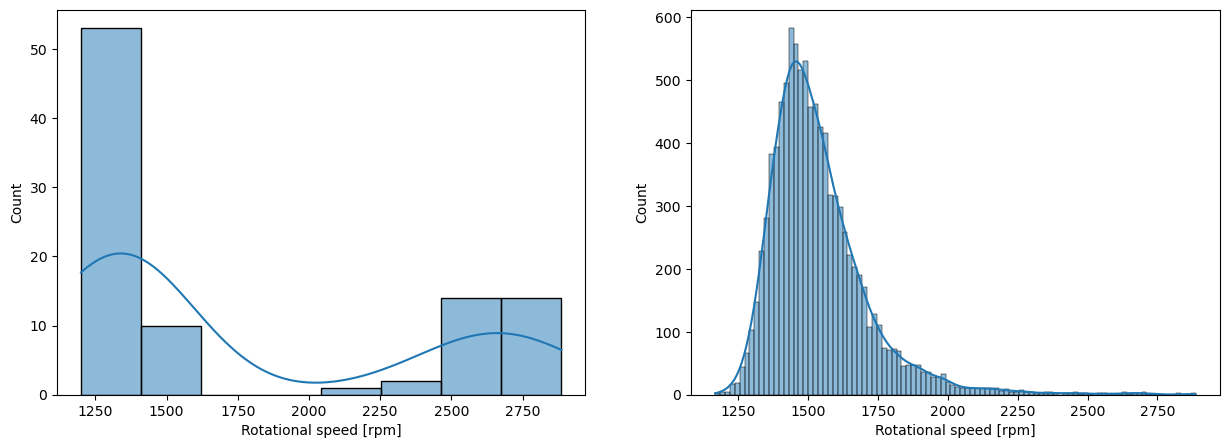

In [ ]:
# Plotting histogram 
# Quite clear illustration of swet spot where very few power failures occur 
# Plotting beside histogram for rotational speed - looks plausible for machine to operate from 1500 up to 2000


powerfailure = machine.loc[machine['Failure Type'] == 'Power Failure']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = powerfailure['Rotational speed [rpm]'], kde= True)
plt.subplot(1,2,2)
sns.histplot(x = machine['Rotational speed [rpm]'], kde = True)
plt.show()

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

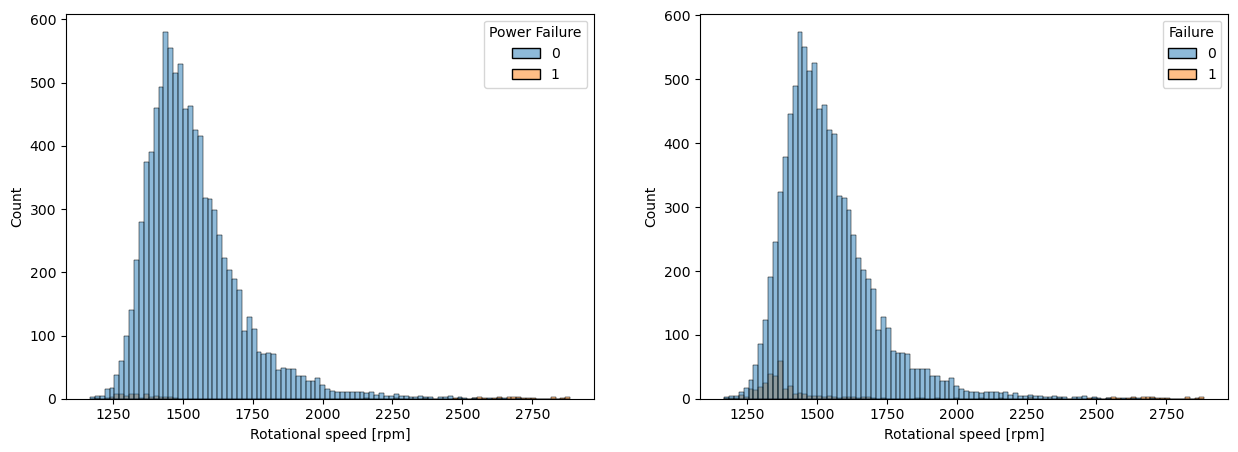

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = machine2['Rotational speed [rpm]'], hue = machine2['Power Failure'])
plt.subplot(1,2,2)
sns.histplot(x = machine['Rotational speed [rpm]'], hue = machine['Failure'])

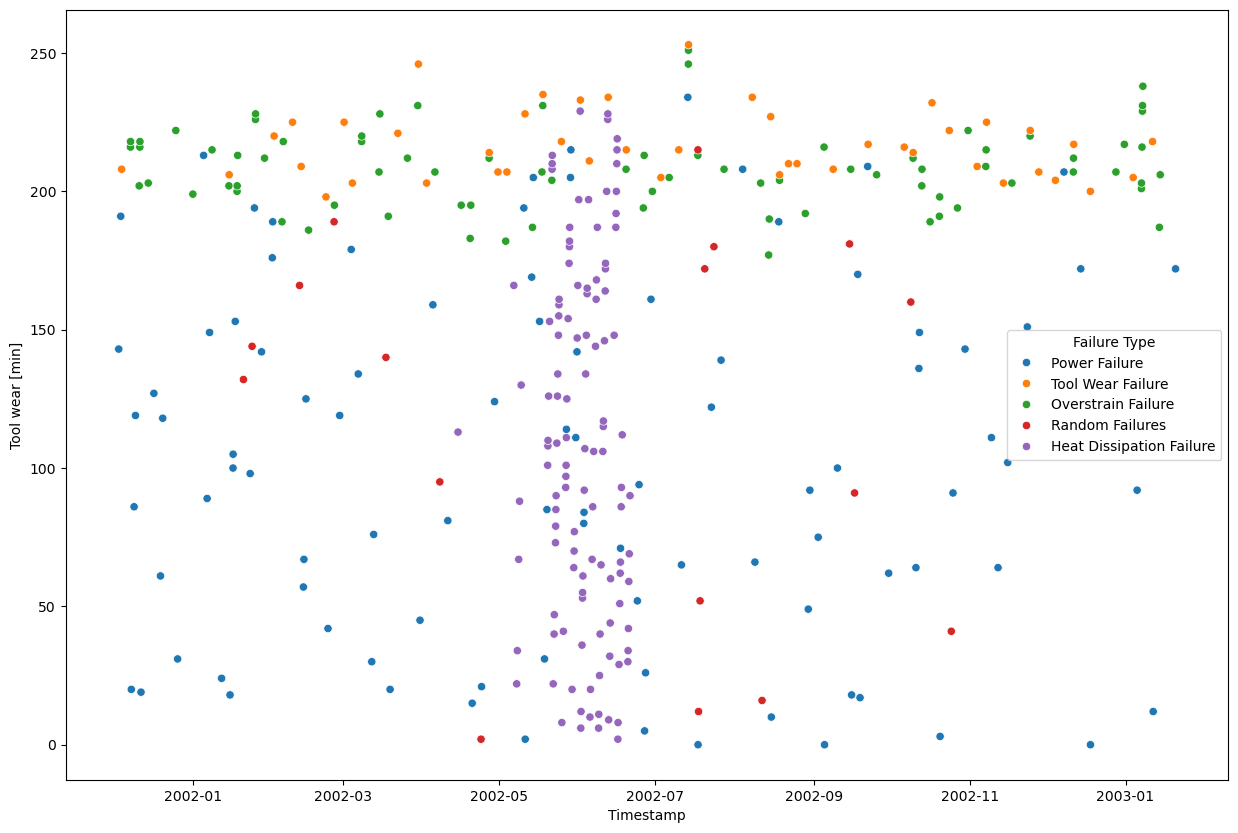

In [ ]:
# Plotting to see tool wear as observed correlation with higher values of tool wear and failures
# Can see tool wear failures only occur > around 190 
# Same with overstrain failures but maybe closer to 180 for these
machinefail = machine.loc[machine['Failure'] == 1]
plt.figure(figsize=(15,10))
sns.scatterplot(x = machinefail['Timestamp'], y = machinefail['Tool wear [min]'], hue = machinefail['Failure Type'],  palette=failure_colors)
plt.show()

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

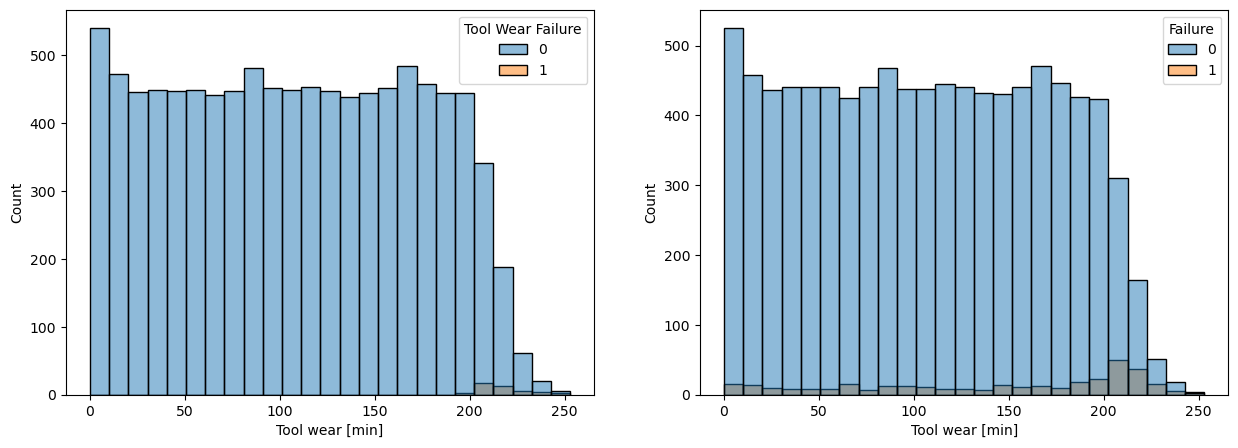

In [ ]:
# Maintaining tool wear < 190 will greatly reduce number of tool wear failures

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = machine2['Tool wear [min]'], hue = machine2['Tool Wear Failure'])
plt.subplot(1,2,2)
sns.histplot(x = machine['Tool wear [min]'], hue = machine['Failure'])


<Axes: xlabel='Tool wear [min]', ylabel='Count'>

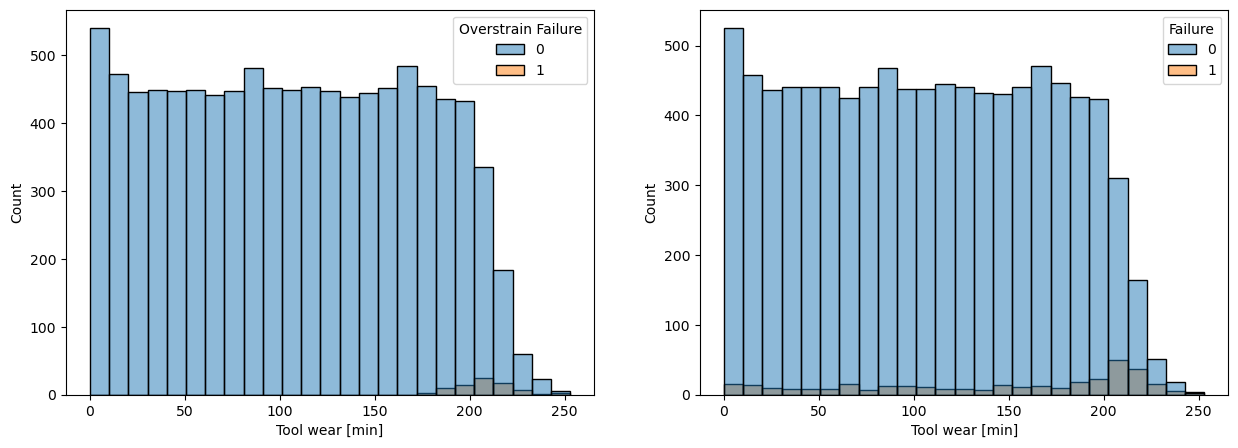

In [ ]:
# High tool wear looks to be correlated with both overstrain and tool wear failures

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = machine2['Tool wear [min]'], hue = machine2['Overstrain Failure'])
plt.subplot(1,2,2)
sns.histplot(x = machine['Tool wear [min]'], hue = machine['Failure'])

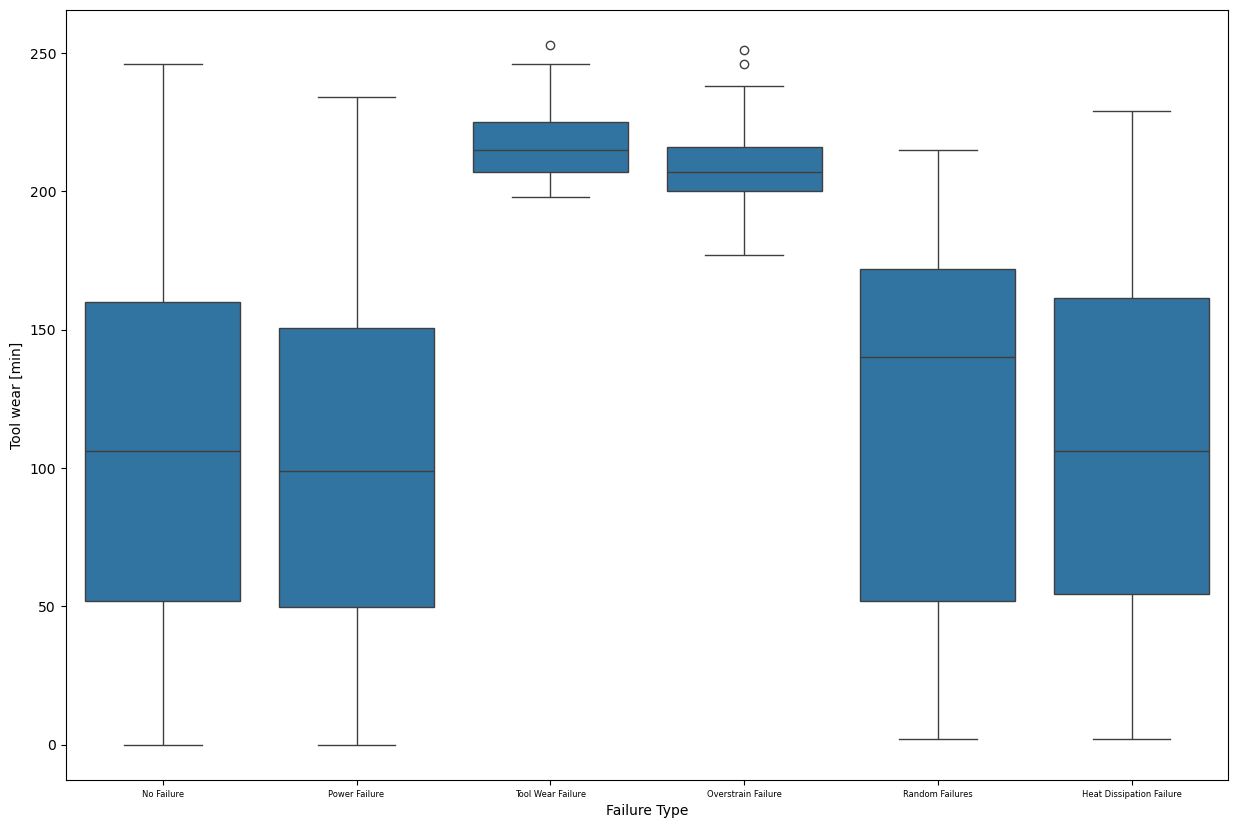

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(x = machine['Failure Type'], y = machine['Tool wear [min]'])
plt.xticks(fontsize =6)
plt.show()

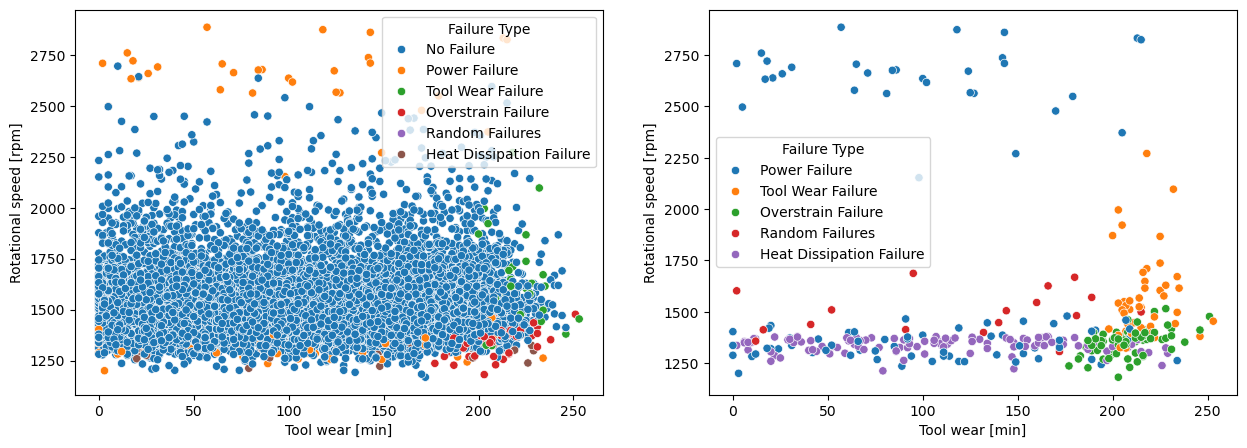

In [ ]:
# Would be interesting to see how rotational speed and tool wear move together with failures
# Clear reccomendation to client to keep toolwear below around 170 to avoid overtrain and tool wear failures
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = machine['Tool wear [min]'], y = machine['Rotational speed [rpm]'], hue = machine['Failure Type'])
plt.subplot(1,2,2)
sns.scatterplot(x=machinefail['Tool wear [min]'], y = machinefail['Rotational speed [rpm]'], hue = machinefail['Failure Type'])
plt.show()

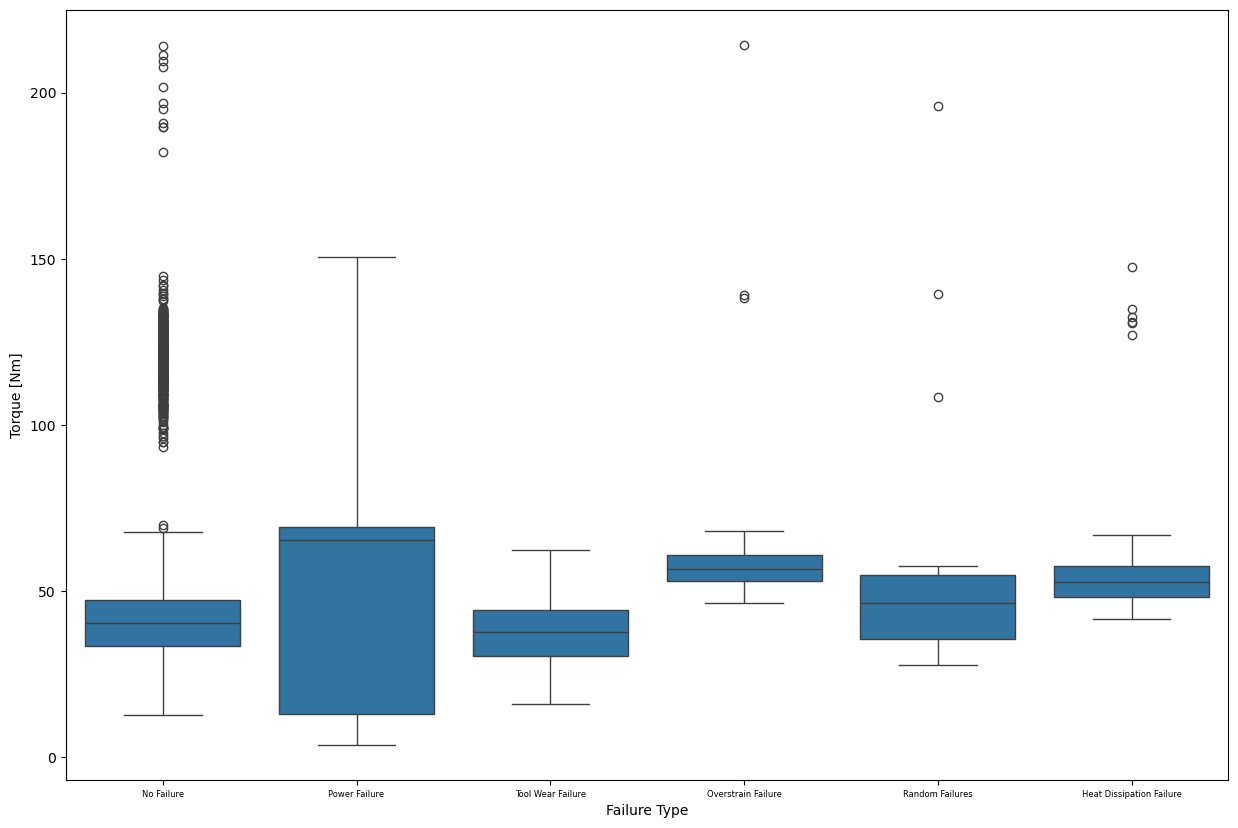

In [ ]:
# Nothing as clear can be taken from torque
plt.figure(figsize=(15,10))
sns.boxplot(x = machine['Failure Type'], y = machine['Torque [Nm]'])
plt.xticks(fontsize =6)
plt.show()

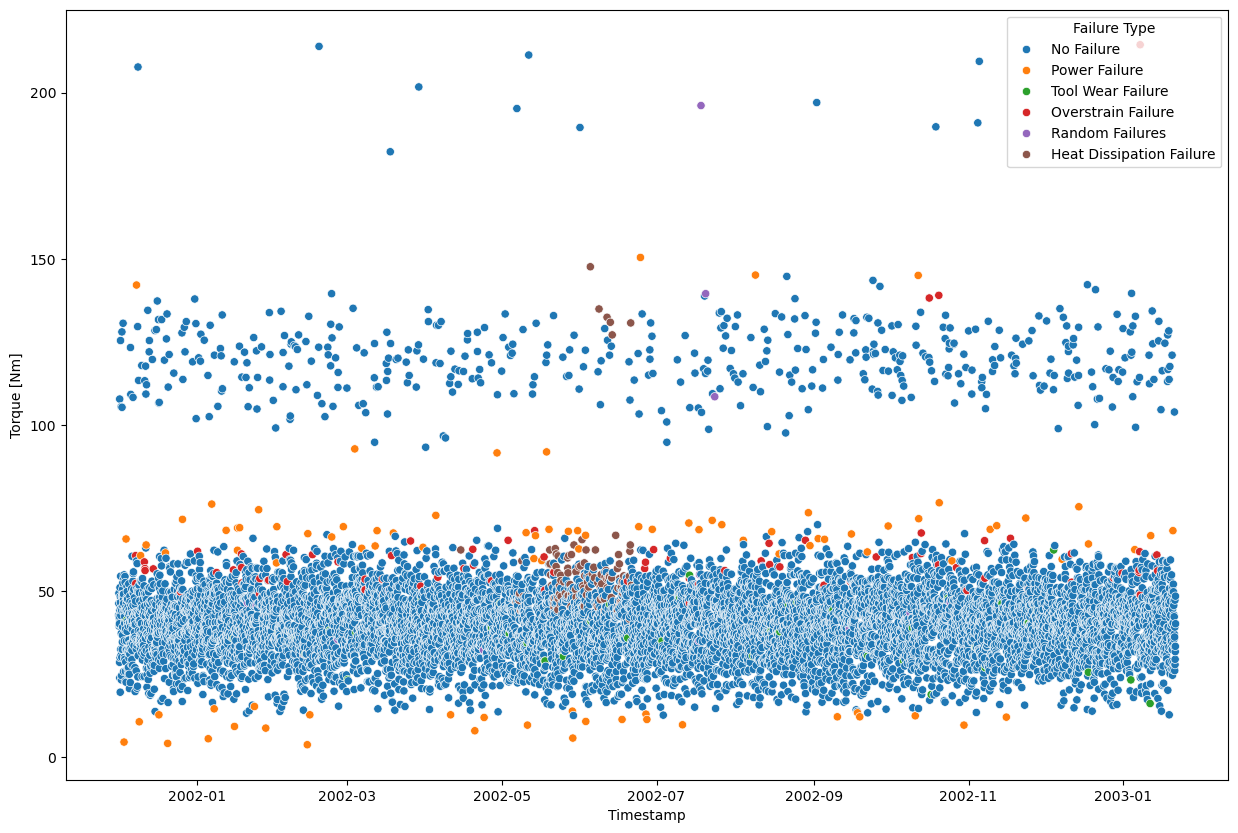

In [50]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = machine['Timestamp'], y = machine['Torque [Nm]'], hue = machine['Failure Type'])
plt.show()

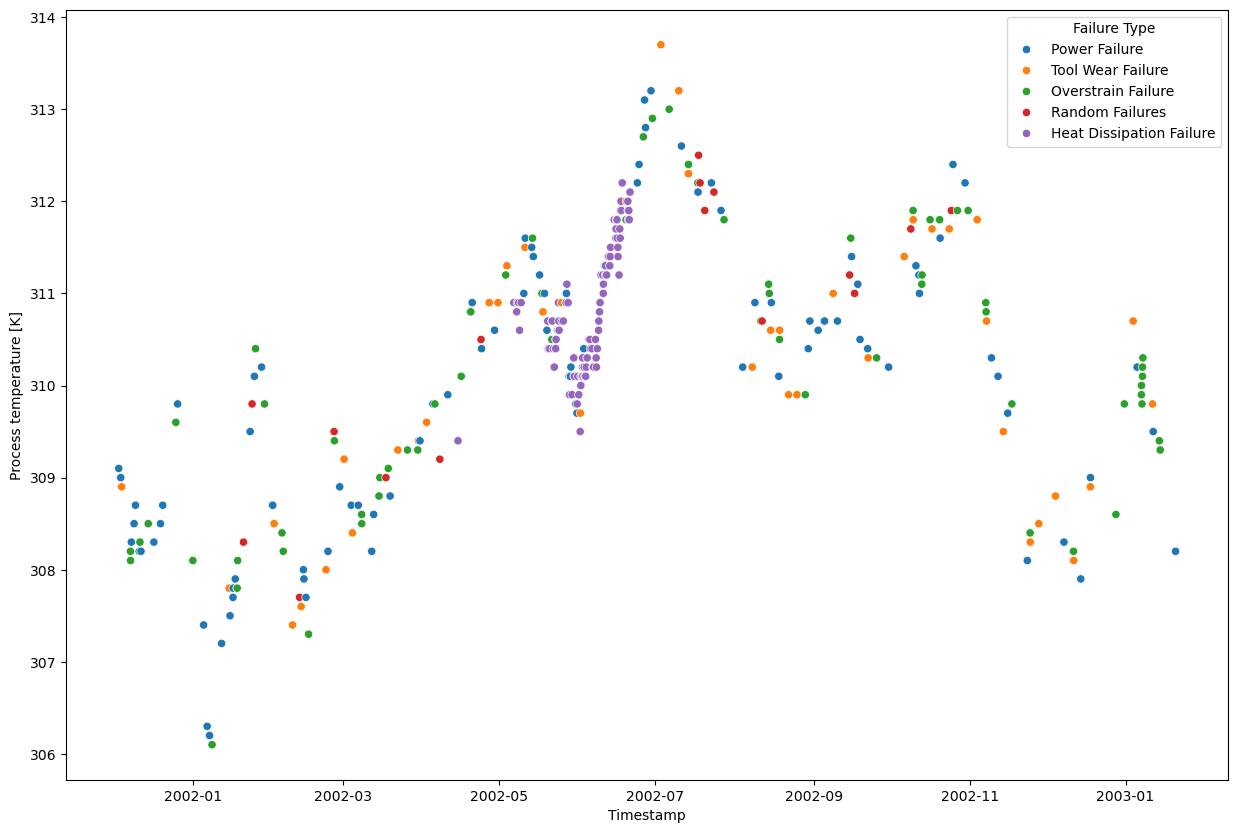

In [ ]:
# Not much can be taken from process temperature
machinefail = machine.loc[machine['Failure'] == 1]
plt.figure(figsize=(15,10))
sns.scatterplot(x = machinefail['Timestamp'], y = machinefail['Process temperature [K]'], hue = machinefail['Failure Type'],  palette=failure_colors)
plt.show()

In [ ]:
# EDA concluded and ready to move on to machine learning
# Clear recommendations can be made from eda alone 
# Maintain air temperature below 300 kelvin, maintain rotational speed between 1500 and 2000 as much as possible
# Maintain tool wear below 170